In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pysnooper import snoop
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pickle

iris = load_iris()
X = iris.data
X= X[50:,[0,2]] #アイリスの特徴量を２つに限定
X = np.array(X)
y =  iris.target.reshape(-1,1)
y= y[50:] #versicolorとvirginicaに限定
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
y_train_std = sc.fit_transform(y_train)
y_test_std = sc.fit_transform(y_test)

/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
X.shape

(100, 2)

In [15]:
def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [16]:
y.shape

(100, 1)

In [17]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None,lamda = 0.18):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.loss
        self.val_loss
        self.X = np.array(X)
        self.y = y
        self.y = self.y.reshape(-1,1)
        self.lamda = lamda
        self.X = X
        self.X_val = X_val
        self.y_val = y_val
        self.theta = np.random.randn(self.X.shape[1],1)
        if self.bias is not None:
            self.X = np.insert(self.X, 0, np.ones(self.X.shape[0]),axis=1)
            self.theta = np.random.randn(self.X.shape[1],1)
        if X_val is not None and y_val is not None and self.bias is not None:
            self.X_val = np.insert(self.X_val, 0, np.ones(self.X_val.shape[0]),axis=1)
        self.y = y
        self._gradient_descent()

        if self.verbose:
            self.show_loss_plt()
            #verboseをTrueにした際は学習過程を出力
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h = np.dot(X,self.theta)
        return h

            
    def _gradient_descent(self):
        """
        線形の仮定関数を計算する


        Returns
        -------
          次の形のndarray, shape (n_features, 1)
          線形の仮定関数による推定結果

        """
        
        m =  len(self.X)
        for i in range(self.iter):
            if self.X_val is not None and self.y_val  is not None:
                if i == 0: #初項は重み付けが別
                    self.val_loss[i] = self.cost_function(self.X_val,self.y_val)
                    self.theta = self.theta - self.lr * np.dot(self.X.T,(self.sigmoid(self._linear_hypothesis(self.X)) - self.y))/m
                else:
                    self.val_loss[i] = self.cost_function(self.X_val,self.y_val)
                    self.loss[i] = self.cost_function(self.X,self.y)
                    self.theta = self.theta - self.lr * np.dot(self.X.T,(self.sigmoid(self._linear_hypothesis(self.X)) - self.y))/m - self.lamda * self.theta / m
            else: #バイアス無し
                self.loss[i]= self.cost_function(self.X,self.y)
                self.theta = self.theta - self.lr * np.dot(self.X.T,(self.sigmoid(self._linear_hypothesis(self.X)) - self.y))/m - self.lamda * self.theta / m
        return self.theta #重みを返す
    
    
    
    def show_loss_plt(self):
        sr_itr =[]
        for i in range(0,self.iter):
            sr_itr.append(i)
            
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        
        ax.plot(sr_itr,self.loss,color="g", label = 'loss')
        #lossはグリーン
        if (self.X_val is not None) and (self.y_val  is not None):
        #val_lossは青
            ax.plot(sr_itr,self.val_loss,color="b", label = 'val_loss')
        ax.set_xlabel('イテレータの回数')
        ax.set_ylabel('誤差関数の値')
        plt.show()
        self.loss =[]
        self.val_loss =[]
    
    
    def sigmoid(self,X):
        """
        活性化関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          非線形の活性化関数による推定結果
        """
        return 1 / (1 + np.exp(-X))
    
    def cost_function(self,X,y):
        """
        コスト関数に正則化項をつけて計算

        Parameters
        ----------

        Returns
        ----------
        cost_f : numpy.float

        """
        y_pred = self.sigmoid(self._linear_hypothesis(X))
        cost_f = (-y*np.log(y_pred) -(1- y)*np.log(1-y_pred)).mean() +self.lamda*((self.theta**2).mean())/2.0                 
        return cost_f
    
    def predict(self,X_val):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        predict_y = self.sigmoid(self._linear_hypothesis(X_val))
        return predict_y
    
    def theta_save(self):
        filename = 'finalized_model.sav'
        pickle.dump(self.theta, open(filename, 'wb'))

In [18]:
sr = ScratchLogisticRegression(2000,0.003,None,True)

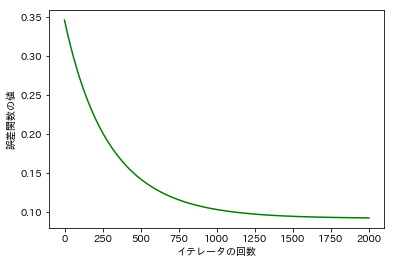

In [19]:
sr.fit(X_train_std,y_train_std)

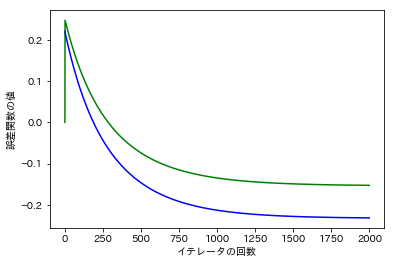

In [20]:
sr = ScratchLogisticRegression(2000,0.003,True,True)
sr.fit(X_train_std,y_train_std,X_test_std,y_test_std)

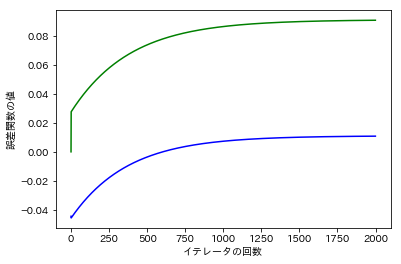

In [21]:
sr = ScratchLogisticRegression(2000,0.003,None,True)
sr.fit(X_train_std,y_train_std,X_test_std,y_test_std)
pred_y = sr.predict(X_test_std)

In [22]:
pred_y

array([[0.47233231],
       [0.75429824],
       [0.57601587],
       [0.86405585],
       [0.41412145],
       [0.34753405],
       [0.21719629],
       [0.82949345],
       [0.3751937 ],
       [0.25451463],
       [0.84563009],
       [0.34076869],
       [0.36152772],
       [0.5577678 ],
       [0.59376756],
       [0.17292698],
       [0.18399922],
       [0.84563009],
       [0.2406702 ],
       [0.62570681]])

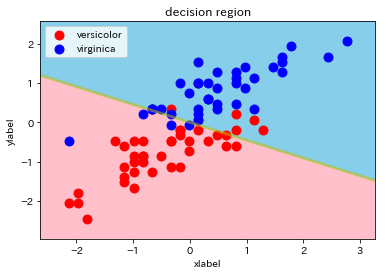

In [23]:
decision_region(X_train_std,y_train_std.flatten(),sr)

# 【問題5】（アドバンス課題）重みの保存

In [24]:
sr.theta_save()

# 【問題6】分類と回帰

分類は決まったカテゴリを分類するものつまり離散値を扱う。回帰は今あるデータからの予測で連続値を予測することもできる。